# Series temporales en Python

Vamos a utilizar fundamentalmente dos bibliotecas:

- Pandas: https://pandas.pydata.org/pandas-docs/stable/timeseries.html
- scipy http://www.statsmodels.org/devel/tsa.html

## Estacionaridad

Un serie temporal (ST) se dice que es estacionaria si sus propiedades estadísticas, tales como la media, la varianza y la covarianza, son constantes a lo largo del tiempo.

- Media constante.
- Varianza constante.
- La covarianza entre dos instantes depende del número de observaciones que les separan, no del instante de tiempo.

### ¿Que es lo que provoca la no estacionaridad de una ST?.

Hay dos razones fundamentales:

1. La tendencia -- La media varía a lo largo del tiempo. Por ejemplo, el número de pasajeros en general ha crecido conforme han ido pasando los años.

2. Estacionalidad -- Variaciones que suceden en periodos específicos de tiempo. Por ejemplo, las personas pueden tener una tendencia a comprar coches en determinadas épocas del año o meses, debido a las pagas extras o a las vacaciones.

## Estructura de una serie temporal en Pandas

- Una ST es similar a una lista o un *array* en Python.
- Representa una serie de valores (numéricos o de otro tipo) en forma de columna de datos.
- Proporciona alguna funcionalidad adicional (métodos y operadores), que hacen que sea una versión más potente que una lista.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Crear una serie temporal a partir de una lista
ser = pd.Series([1, 3])
print(ser)

# Usar una serie de cadenas como índice
prices = {'apple': 4.99,
         'banana': 1.99,
         'orange': 3.99}
ser = pd.Series(prices)
print(ser)

x = pd.Series(np.arange(1,3), index=[x for x in 'ab'])
print(x)
print(x['b'])

0    1
1    3
dtype: int64
apple     4.99
banana    1.99
orange    3.99
dtype: float64
a    1
b    2
dtype: int64
2


## Análisis de series temporales a partir de Google Trends

Inspirado en: https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

Utilizaremos los datos de Google Trends de palabras clave como 'diet' y 'gim' para ver como varían a lo largo del tiempo, al mismo tiempo que aprendemos sobre tendencias y estacionalidad en datos de series temporales.

Los datos se corresponden a 

In the Facebook Live code along session on the 4th of January, we checked out Google trends data of keywords 'diet', 'gym' and 'finance' to see how they vary over time. We asked ourselves if there could be more searches for these terms in January when we're all trying to turn over a new leaf?

In this tutorial, you'll go through the code that we put together during the session step by step. You're not going to do much mathematics but you are going to do the following:

- Read data
- Recode data
- Exploratory Data Analysis

## Read data

In [3]:
try:
    url = "https://raw.githubusercontent.com/datacamp/datacamp_facebook_live_ny_resolution/master/data/multiTimeline.csv"
    df = pd.read_csv(url, skiprows=2)
except:
    df = pd.read_csv("./data/multiTimeline.csv", skiprows=2)

print(df.head())

# Rename columns
df.columns = ['month', 'diet', 'gym', 'finance']

# Describe
print(df.describe())

print(df.info())

     Month  diet: (Worldwide)  gym: (Worldwide)  finance: (Worldwide)
0  2004-01                100                31                    48
1  2004-02                 75                26                    49
2  2004-03                 67                24                    47
3  2004-04                 70                22                    48
4  2004-05                 72                22                    43
             diet         gym     finance
count  168.000000  168.000000  168.000000
mean    49.642857   34.690476   47.148810
std      8.033080    8.134316    4.972547
min     34.000000   22.000000   38.000000
25%     44.000000   28.000000   44.000000
50%     48.500000   32.500000   46.000000
75%     53.000000   41.000000   50.000000
max    100.000000   58.000000   73.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    168 non-nu

## Recodificar los datos

Ahora, vamos a convertir la columna 'month' en un `DateTime` y hacer que sea el índice del `DataFrame`.

Hacemos esto porque al ver el resultado del método `.info()` nos damos cuenta que la columna `month` es de tipo `object`. Este tipo genérico encapsula todo desde cadenas a enteros y esto no es lo que queremos cuando examinamos series temporales. Utilizaremos el método `.to_datetime()` para convertir la columna `month` del `DataFrame` a tipo `DateTime`.

¡Ten cuidado! Haz uso del argumento `inplace` cuando estableces el índice del `DataFrame` de forma que los cambios se hagan realmente sobre la copia actual (y no se devuelva una copia modificada).

In [4]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

print(df.head())

            diet  gym  finance
month                         
2004-01-01   100   31       48
2004-02-01    75   26       49
2004-03-01    67   24       47
2004-04-01    70   22       48
2004-05-01    72   22       43


## Análisis exploratorio de los datos

Puedes utilizar la herramienta de visualización de `pandas` `.plot()` para representar tus datos como 3 líneas en una sola figura (una para cada columna, `diet`, `gym` y `finance`).

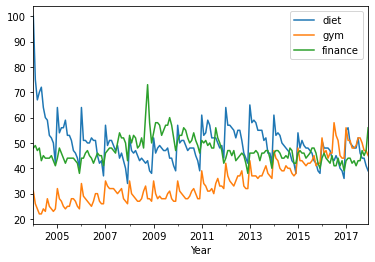

In [5]:
df.plot()
plt.xlabel('Year');

<AxesSubplot:xlabel='month'>

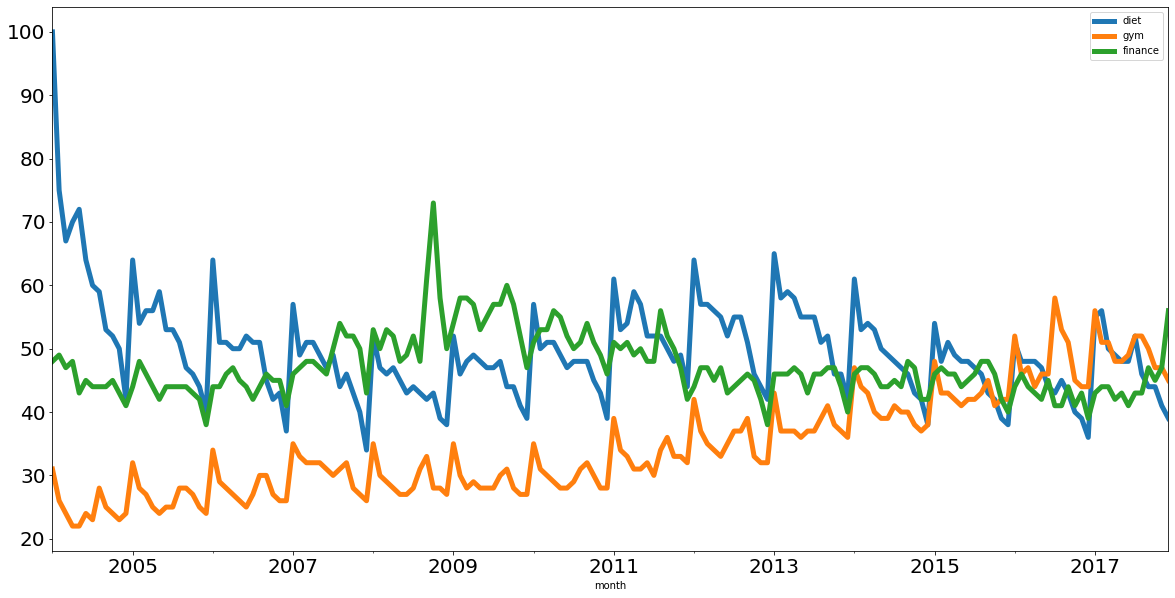

In [6]:
# Cambiar los parámetros de la figura
df.plot(figsize=(20,10), linewidth=5, fontsize=20)

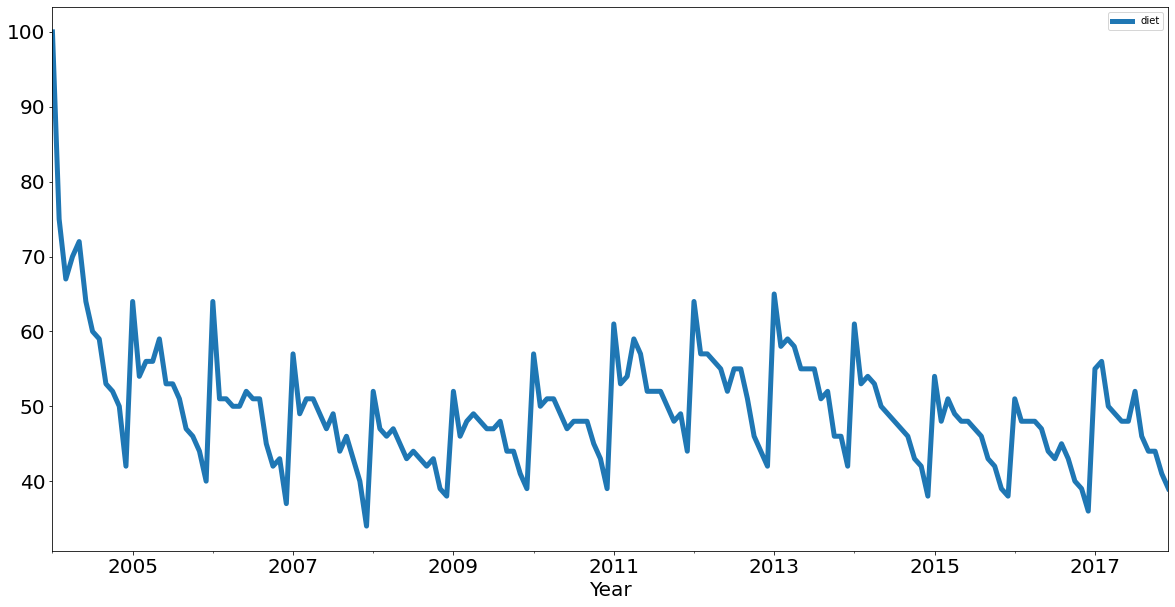

In [7]:
# Representar solo una figura
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Ten en cuenta que estos datos son relativos. Como se puede leer en Google Trends:

> Numbers represent search interest relative to the highest point on the chart
> for the given region and time.
> A value of 100 is the peak popularity for the term.
> A value of 50 means that the term is half as popular.
> Likewise a score of 0 means the term was less than 1% as popular as the peak.

## Remuestreo, suavizado, obtención de ventanas, medias deslizantes: tendencias

Las medias deslizantes toman, para cada instante de tiempo, la media de los puntos que le rodean. El número de puntos se especifica como un tamaño de ventana.

Consultar el siguiente enlace http://pandas.pydata.org/pandas-docs/stable/timeseries.html

El valor 'A' significa frecuencia anual (tomada a final de año)

<class 'pandas.core.resample.DatetimeIndexResampler'>
month
2004-12-31    63.666667
2005-12-31    51.916667
2006-12-31    48.916667
2007-12-31    46.666667
2008-12-31    44.083333
Freq: A-DEC, Name: diet, dtype: float64
month
2004-01-01          NaN
2004-02-01          NaN
2004-03-01          NaN
2004-04-01          NaN
2004-05-01          NaN
2004-06-01          NaN
2004-07-01          NaN
2004-08-01          NaN
2004-09-01          NaN
2004-10-01          NaN
2004-11-01          NaN
2004-12-01    63.666667
2005-01-01    60.666667
2005-02-01    58.916667
2005-03-01    58.000000
2005-04-01    56.833333
2005-05-01    55.750000
2005-06-01    54.833333
2005-07-01    54.250000
2005-08-01    53.583333
Name: diet, dtype: float64


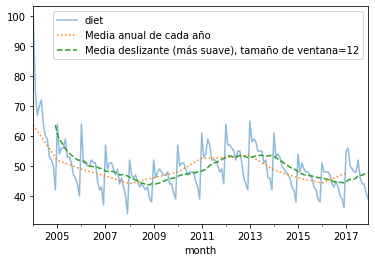

In [8]:
diet = df['diet']

print(type(diet.resample('A')))

diet_resamp_yr = diet.resample('A').mean()
print(diet_resamp_yr.head())
diet_roll_yr = diet.rolling(12).mean()
print(diet_roll_yr.head(20))

ax = diet.plot(alpha=0.5, style='-') # Guardamos los ejes (ax) para reutilizarlos en el resto de plots
diet_resamp_yr.plot(style=':', label='Media anual de cada año', ax=ax)
diet_roll_yr.plot(style='--', label='Media deslizante (más suave), tamaño de ventana=12', ax=ax)
ax.legend();

Podemos hacer la misma operación con `numpy`:

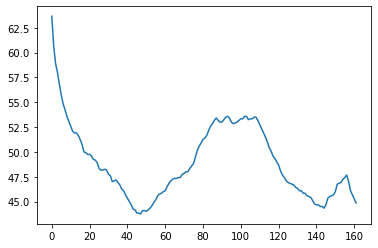

In [9]:
x = np.asarray(df[['diet']])
win = 12
win_half = int(win / 2)
#print([((idx-win_half), (idx+win_half)) for idx in np.arange(win_half, len(x))])

diet_smooth = np.array([x[(idx-win_half):(idx+win_half)].mean() for idx in np.arange(win_half, len(x))])
# Ojo, no estamos saliendo de rango, pero es ignorado por numpy
plt.plot(diet_smooth);

Hacemos un nuevo `DataFrame` que incluya la concatenación de los valores para `diet` y `gym` ya suavizados.

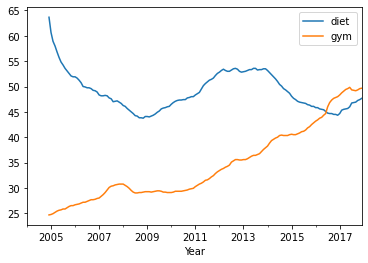

In [10]:
gym = df['gym']

df_avg = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_avg.plot()
plt.xlabel('Year');

Eliminar la tendencia de la serie original.

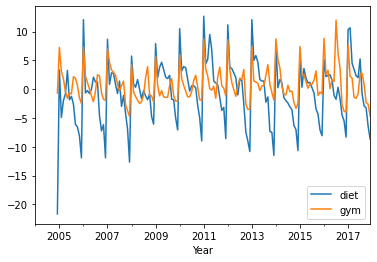

In [11]:
df_dtrend = df[["diet", "gym"]] - df_avg
df_dtrend.plot()
plt.xlabel('Year');

## Diferenciación de primer orden: patrones estacionales

La diferenciación de primer orden nos permite eliminar la tendencia y ver solo los patrones estacionales.

month
2004-01-01    100
2004-02-01     75
2004-03-01     67
2004-04-01     70
2004-05-01     72
Name: diet, dtype: int64
month
2004-01-01      NaN
2004-02-01    100.0
2004-03-01     75.0
2004-04-01     67.0
2004-05-01     70.0
Name: diet, dtype: float64
month
2004-01-01     NaN
2004-02-01   -25.0
2004-03-01    -8.0
2004-04-01     3.0
2004-05-01     2.0
Name: diet, dtype: float64


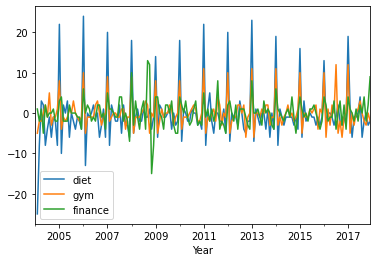

In [12]:
# diff = original - shiftted data
print(diet.head())
print(diet.shift().head()) # Serie con retardo de 1 (X_{t-1})
print(diet.diff().head()) # Serie de diferencias de 1 (X_t-X_{t-1})
assert np.all((diet.diff() == diet - diet.shift())[1:])

df.diff().plot()
plt.xlabel('Year');

## Periodicidad y correlación

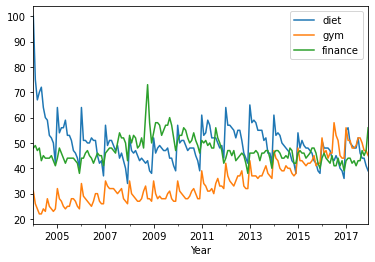

In [13]:
df.plot()
plt.xlabel('Year');

Obtener la matriz de correlaciones

In [14]:
print(df.corr())

             diet       gym   finance
diet     1.000000 -0.100764 -0.034639
gym     -0.100764  1.000000 -0.284279
finance -0.034639 -0.284279  1.000000


¡`diet` y `gym` tienen una correlación negativa!
Recuerda que tienes un componente estacional y uno de tendencia.

- Los componentes de tendencia parecen estar negativamente correlados.
- Los componentes estacionales estaría positivamente correlados.

En realidad, al estar trabajando sobre la serie original, estamos viendo las correlaciones al mismo tiempo.

Correlación estacional: correlación de las diferencias de primer orden de estas STs.

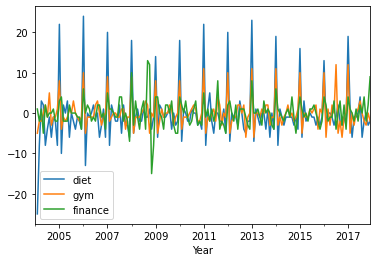

In [15]:
df.diff().plot()
plt.xlabel('Year');

La matriz de correlación es ahora

In [16]:
print(df.diff().corr())

             diet       gym   finance
diet     1.000000  0.758707  0.373828
gym      0.758707  1.000000  0.301111
finance  0.373828  0.301111  1.000000


Para verlo todo mucho más claro, podemos usar el método `seasonal_decompose` que descompone la serie en sus componentes estacional, de tendencia y residual.

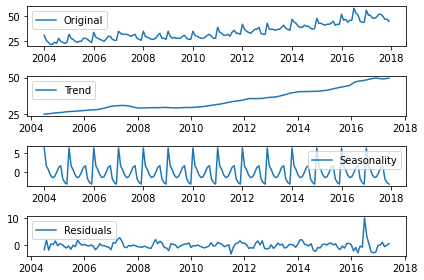

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

x = gym

x = x.astype(float) # force float
decomposition = seasonal_decompose(x)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(x, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Autocorrelación

Una ST se dice que es periódica si se repite en intervalos equiespaciados en el tiempo, por ejemplo, cada 12 meses.

La función de autocorrelación (ACF) es una medida de la correlación entre la ST con una versión retardada de la misma. Por ejemplo, si tomamos lag=5, ACF compararía los instantes t6, t7, t8... de la ST con t1, t2, t3...

Existe una función de `pandas` que nos hace una representación de estos valores de autocorrelación:

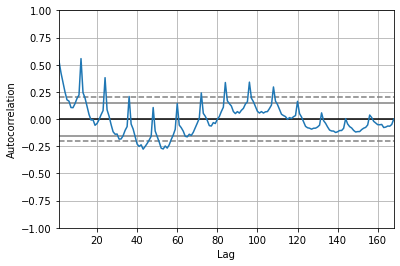

In [18]:
# from pandas.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot

x = df["diet"].astype(float)
autocorrelation_plot(x);

También podemos calcular los valores de ACF:

Text(0.5, 1.0, 'Autocorrelation Function')

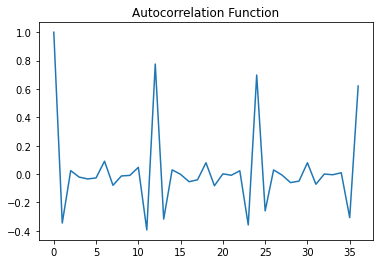

In [19]:
from statsmodels.tsa.stattools import acf

x_diff = x.diff().dropna() # El primer término será NA
lag_acf = acf(x_diff, nlags=36, fft=True)
plt.plot(lag_acf)
plt.title('Autocorrelation Function')

Como se puede observar, el gráfico ACF tiene picos cada 12 meses, lo que quiere decir que la serie está correlada consigo misma de forma anual (enero con enero, febrero con febrero...).

## Predicción de series temporales utilizando modelos AutoRegressive Moving Average (ARMA)

Inspirado en:

- https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781783553358/7/ch07lvl1sec77/arma-models

- http://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model

- ARIMA: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

Los modelos ARMA se suelen utilizar a menudo como herramienta para predecir valores de un ST.
Estos modelos combinan una parte AutoRegresiva (AR) con una parte de medias móviles (Moving Average, MA).
En los modelos MA, asumimos que una variable es la suma de la media de la serie temporal y una combinación lineal de componentes de ruido.

Los modelos AR y MA pueden tener distinto orden. En general, podemos definir un modelo ARMA con $p$ términos autorregresivos y $q$ términos de medias móviles de la siguiente forma:

$$
X_t = \sum_i^p \phi_i X_{t-i} +\sum_i^q \theta_i a_{t-i} + a_t
$$

### Eligiendo $p$ y $q$

Lo primero que deberíamos hacer es representar las funciones de correlación parcial (PACF) para $p$ y las funciones de correlación (ACF) para $q$.

La función de autocorrelación parcial (PACF) mide la correlación entre la ST en una versión retardada de sí misma pero eliminando antes la varianza ya explicada por retardos anteriores. Por ejemplo, si medimos el PACF para un $lag=5$ tendremos en cuenta la correlación con los valores de la serie de hace 5 instantes de tiempo, pero eliminando la varianza ya explicada por los restardos 1, 2, 3 y 4.

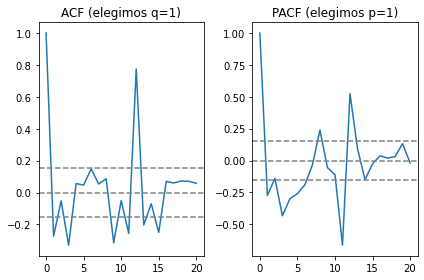

In [20]:
from statsmodels.tsa.stattools import acf, pacf

x = df["gym"].astype(float)

x_diff = x.diff().dropna() # El primer término será NA

# Valores ACF y PACF:
lag_acf = acf(x_diff, nlags=20, fft=True)
lag_pacf = pacf(x_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('ACF (elegimos q=1)')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('PACF (elegimos p=1)')
plt.tight_layout()

En este gráfico, las dos líneas discontinuas a ambos lados del 0 son intervalos de confianza. Estos intervalos se usan para seleccionar $p$ y $q$ de la siguiente forma:

- $p$: elegir el valor del desfase a partir del cual el PACF cruza el valor superior del intervalo de confianza la primera vez. En este caso $p=1$.

- q: elegir el valor del desfase a partir del cual el ACF cruza el valor superior del intervalo de confianza la primera vez. En este caso $q=1$.

### Entrenar un modelos ARMA con statsmodels

1. Definir el modelo llamando a `ARMA()` y dándole los valores de $p$ y de $q$.

2. Entrenar el modelo usando el conjunto de entrenamiento a partir del método `fit()`.

3. Realizar las predicciones llamando a `predict()` el índice de los instantes de tiempo a predecir.

/home/pedroa/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/pedroa/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/pedroa/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                    gym   No. Observations:                  168
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -436.852
Date:                Mon, 07 Feb 2022   AIC                            881.704
Time:                        19:32:51   BIC                            894.200
Sample:                    01-01-2004   HQIC                           886.776
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4287     14.339      2.541      0.011       8.325      64.532
ar.L1          0.9967      0.007    152.509      0.000       0.984       1.009
ma.L1         -0.7494      0.065    -11.568      0.0

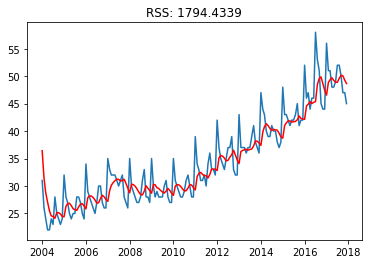

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo más general Seasonal ARIMA multiplicativo SARIMAX(p,d,q)x(P,D,Q,s)
# order=(p,d,q) seasonal_order(P,D,Q,s)
model = ARIMA(x, order=(1, 0, 1), seasonal_order=(0,0,0,0)).fit() # fit model

print(model.summary())
plt.plot(x)
plt.plot(model.predict(), color='red')
plt.title('RSS: %.4f'% sum((model.fittedvalues-x)**2));